# Importing Neccesary packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import missingno

# Importing Data set

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_c54edf641c5244a980cb66d9b7dabff7 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='gxTpRMtR5VbP9zPeeMLTaieydKR9gKUnNo5hd0xNCPQi',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_c54edf641c5244a980cb66d9b7dabff7.get_object(Bucket='lifeexpectancy-donotdelete-pr-thiqdsvdtqyg3y',Key='Life.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [3]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

# Renaming some column name

In [4]:
df.rename(columns = {'Life expectancy ': 'Life_expectancy',' thinness 5-9 years':'thinness_5-9_years'}, inplace=True)
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', 'thinness_5-9_years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [5]:
df.head()

Country  Year      Status  Life_expectancy  Adult Mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years  thinness_5-9_years  Income composition of resources  \
0                   17.2                17.3                            0.479   
1                   17.5                17.5                            0.476   
2                   17.7                17.7                            0.470   
3                   17.9                18.0                            0.463   
4                   18.2                18.2                            0.454   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5  

[5 rows x 22 columns]

In [6]:
df.describe()

Year  Life_expectancy  Adult Mortality  infant deaths  \
count  2938.000000      2928.000000      2928.000000    2938.000000   
mean   2007.518720        69.224932       164.796448      30.303948   
std       4.613841         9.523867       124.292079     117.926501   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.100000        74.000000       0.000000   
50%    2008.000000        72.100000       144.000000       3.000000   
75%    2012.000000        75.700000       228.000000      22.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years  thinness_5-9_years  \
count            2904.000000         2904.000000   
mean                4.839704            4.870317   
std                 4.420195            4.508882   
min                 0.100000            0.100000   
25%                 1.600000            1.500000   
50%                 3.300000            3.300000   
75%                 7.200000            7.200000   
max                27.700000           28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

# checking data types of all columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life_expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

# Showing empty values in columns

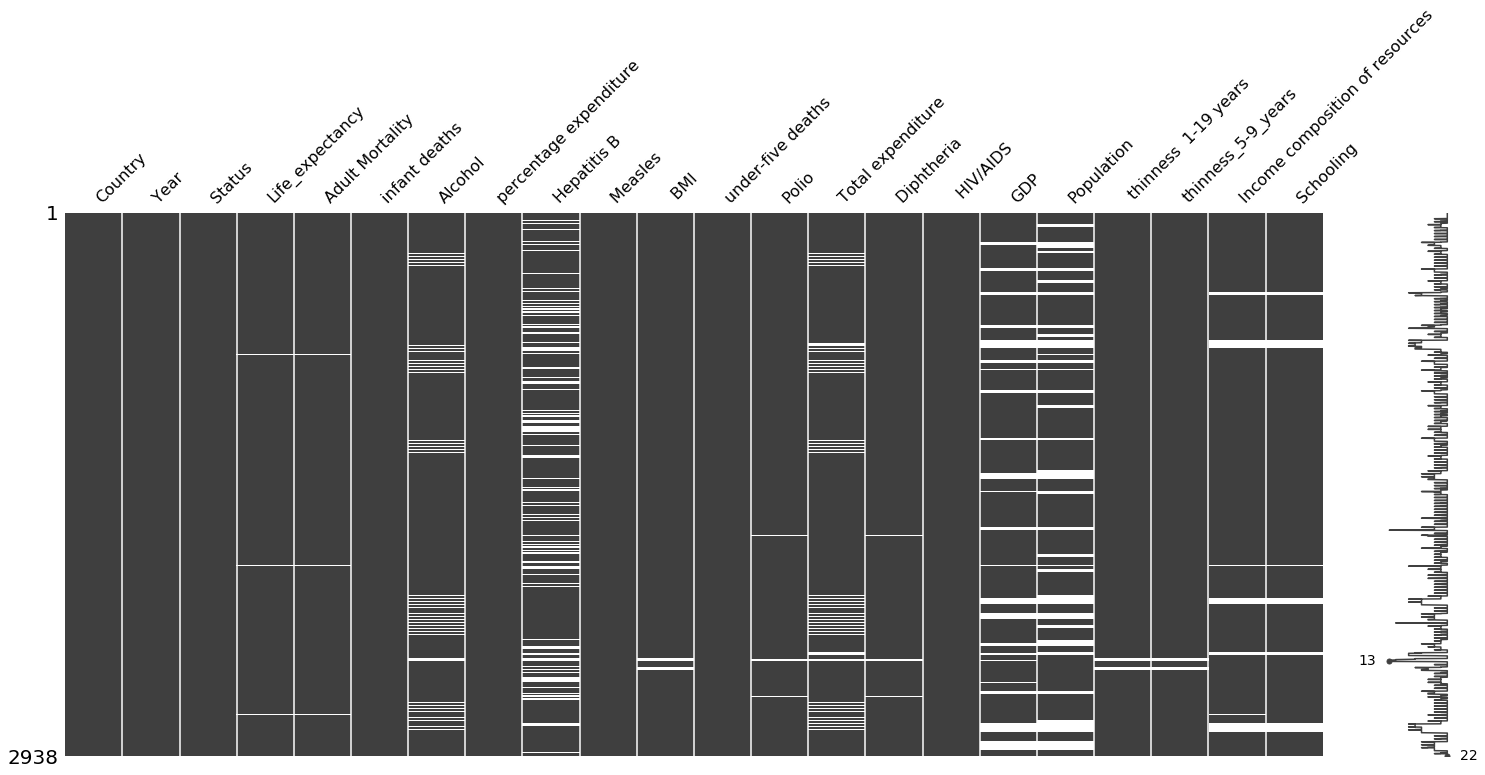

In [8]:
missingno.matrix(df)

In [9]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
thinness_5-9_years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

# Filling the values in columns 

In [10]:
for col in df.columns:
    df[col]=df[col].fillna(method="bfill")
df.shape

(2938, 22)

In [11]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life_expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
thinness_5-9_years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

# Feature Selection

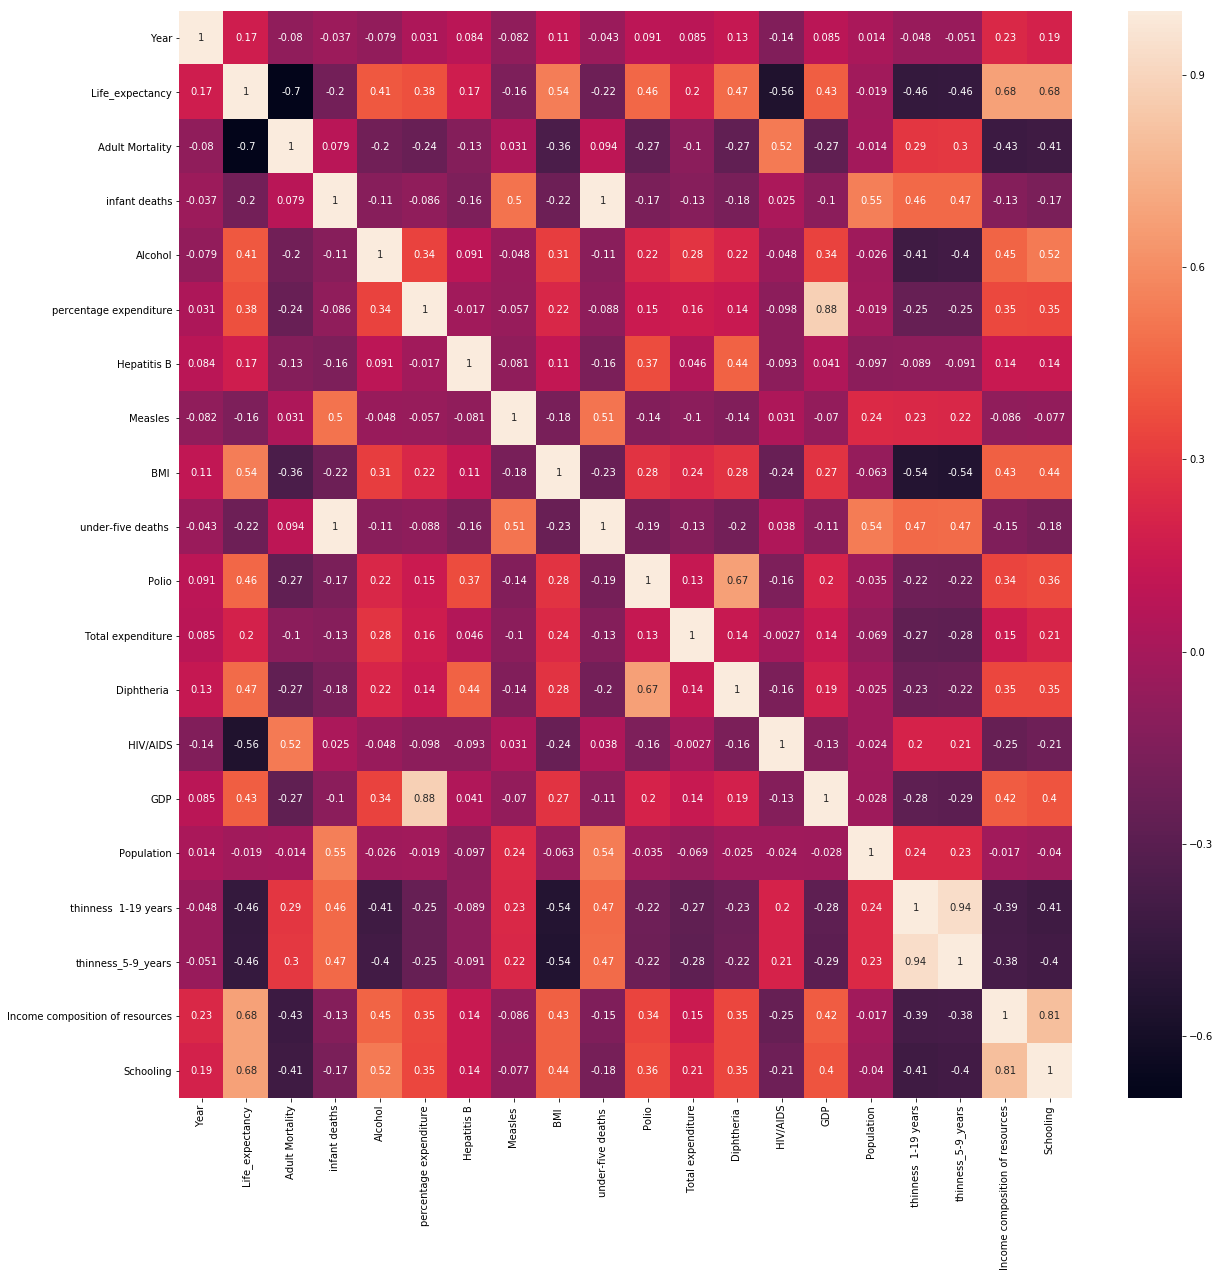

In [12]:
plt.figure(figsize=(20,20))
sn.heatmap(df.corr(),annot=True)

# Visualization of all columns

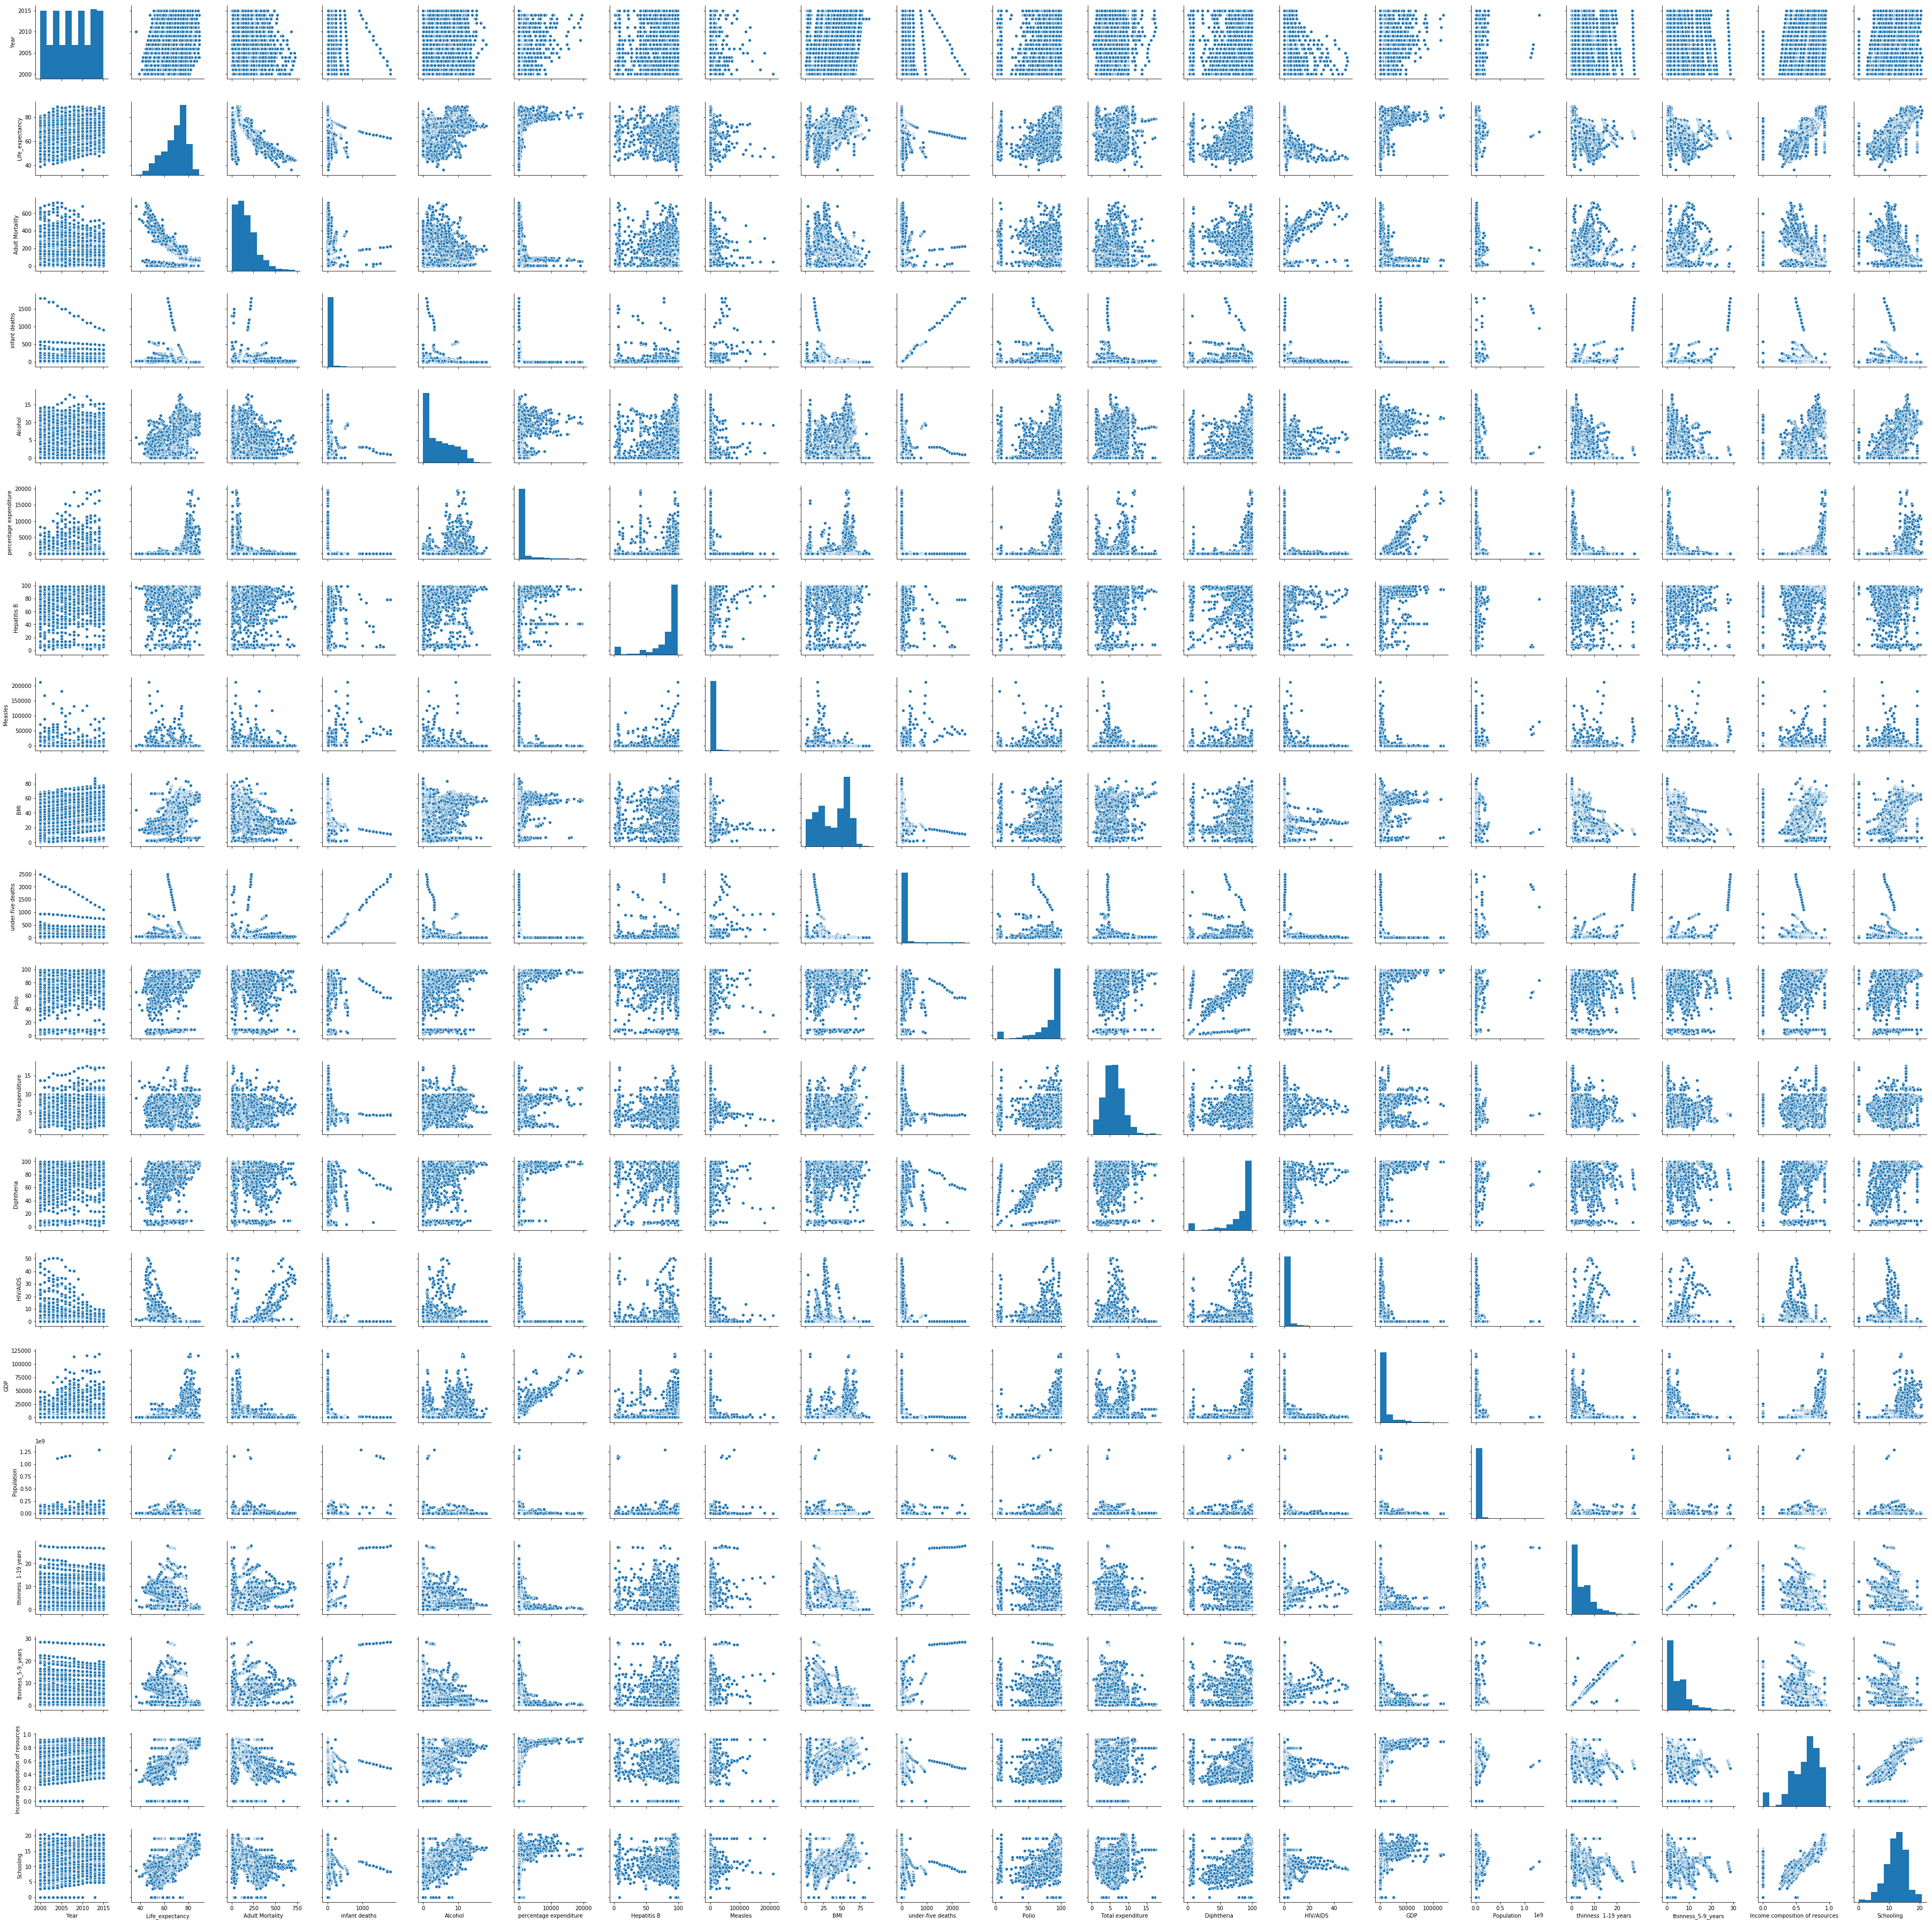

In [13]:
sn.pairplot(df)
plt.show()

# Droping some columns

In [14]:
df = df.drop(['Country','thinness_5-9_years'],axis = 1)
df.head()

Year      Status  Life_expectancy  Adult Mortality  infant deaths  Alcohol  \
0  2015  Developing             65.0            263.0             62     0.01   
1  2014  Developing             59.9            271.0             64     0.01   
2  2013  Developing             59.9            268.0             66     0.01   
3  2012  Developing             59.5            272.0             69     0.01   
4  2011  Developing             59.2            275.0             71     0.01   

   percentage expenditure  Hepatitis B  Measles    BMI   under-five deaths   \
0               71.279624         65.0      1154   19.1                  83   
1               73.523582         62.0       492   18.6                  86   
2               73.219243         64.0       430   18.1                  89   
3               78.184215         67.0      2787   17.6                  93   
4                7.097109         68.0      3013   17.2                  97   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years  Income composition of resources  Schooling  
0                   17.2                            0.479       10.1  
1                   17.5                            0.476       10.0  
2                   17.7                            0.470        9.9  
3                   17.9                            0.463        9.8  
4                   18.2                            0.454        9.5

# Converting string values to integer(Binary-0,1)

In [16]:
df['Status'] = (df['Status'] == 'Developed').astype(int)
df['Status'].head()

0    0
1    0
2    0
3    0
4    0
Name: Status, dtype: int64

In [18]:
x=df.drop(['Life_expectancy'],axis=1)
y=df.Life_expectancy


In [19]:
x.head()

Year  Status  Adult Mortality  infant deaths  Alcohol  \
0  2015       0            263.0             62     0.01   
1  2014       0            271.0             64     0.01   
2  2013       0            268.0             66     0.01   
3  2012       0            272.0             69     0.01   
4  2011       0            275.0             71     0.01   

   percentage expenditure  Hepatitis B  Measles    BMI   under-five deaths   \
0               71.279624         65.0      1154   19.1                  83   
1               73.523582         62.0       492   18.6                  86   
2               73.219243         64.0       430   18.1                  89   
3               78.184215         67.0      2787   17.6                  93   
4                7.097109         68.0      3013   17.2                  97   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years  Income composition of resources  Schooling  
0                   17.2                            0.479       10.1  
1                   17.5                            0.476       10.0  
2                   17.7                            0.470        9.9  
3                   17.9                            0.463        9.8  
4                   18.2                            0.454        9.5

# Importing  and Training of Model

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

In [21]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

# Testing for  inputs

In [22]:
x_test.shape

(1176, 19)

In [52]:
y_pred=model.predict(x_test)
print(y_pred)

[69.98 68.29 84.78 ... 77.18 71.21 71.98]


# Accuracy of Model

In [24]:
model.score(x_train,y_train)

0.990564037740675

In [25]:
model.score(x_test,y_test)

0.9486506073424641

# Predecting Result

In [53]:
Result = model.predict([[2015,0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,0.479,10.1]])
print("Life Expectancy of this Country is : ",Result)

Life Expectancy of this Country is :  [64.8]


# Code for Generating Scoring Endpoint Url

In [27]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-06-14 09:52:45,012 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.
2020-06-14 09:52:48,683 - watson_machine_learning_client.wml_client_error - WARNING - Deployment creation failed. Error: 402. {"trace":"19fq370oimcz","errors":[{"code":"deployments_plan_limit_reached","message":"Current plan 'lite' only allows 5 deployments"}]}


In [28]:
wml_credentials={
  "apikey": "oA2xpCtFiQPRpgoeYUGpr_fD6ck_tdl7a1w-vD7MNj9D",
  "instance_id": "ee299d7d-5851-45a4-bf9e-87063cce7323",
  "url": "https://eu-gb.ml.cloud.ibm.com",                                                                                                                                                                                                                                                                                                                                                                                              
  "username": "18b33122-f157-4bb2-bb23-7aca666aef8e"     
}


In [29]:
client = WatsonMachineLearningAPIClient( wml_credentials )

In [41]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "rohit",
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "rtiwari432@gmail.com",
               client.repository.ModelMetaNames.NAME: "Life_Expectancy"}
              

In [42]:
model_artifact = client.repository.store_model(model,meta_props = model_props)

In [43]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [44]:
published_model_uid

'e77eb785-a419-483a-b320-99cd17885abb'

In [45]:
deployment = client.deployments.create(published_model_uid,name = "Life_expectancy")



#######################################################################################

Synchronous deployment creation for uid: 'e77eb785-a419-483a-b320-99cd17885abb' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='5fc4b71a-21c4-4d22-ac07-82bd9d71178c'
------------------------------------------------------------------------------------------------




In [47]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)

In [48]:
scoring_endpoint 

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/ee299d7d-5851-45a4-bf9e-87063cce7323/deployments/5fc4b71a-21c4-4d22-ac07-82bd9d71178c/online'